To analyze which schools struggle to get funded and why.

In [13]:
import pandas as pd


import matplotlib.pyplot as plt


df = pd.read_csv("../data/Preprocessed_DonorsChoose_dataset 2.csv")
df.head()

,id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,cleaned_titles,cleaned_essays,cleaned_summary,isdigit_summary
0,p253737,mrs,in,grades_prek_2,literacy_language,esl_literacy,0,0,154.60,23,educational support english learners home,students english learners working english seco...,students_need_opportunities_practice_beginning...,0
1,p258326,mr,fl,grades_6_8,history_civics_health_sports,civics_government_teamsports,7,1,299.00,1,wanted projector hungry learners,students arrive school eager learn polite gene...,students_need_projector_help_viewing_education...,0
2,p182444,ms,az,grades_6_8,health_sports,health_wellness_teamsports,1,0,516.85,22,soccer equipment awesome middle school students,true champions not always ones win guts mia ha...,students_need_shine_guards_athletic_socks_socc...,0
3,p246581,mrs,ky,grades_prek_2,literacy_language_math_science,literacy_mathematics,4,1,232.90,4,techie kindergarteners,work unique school filled esl english second l...,students_need_engage_reading_math_way_inspire_...,0
4,p104768,mrs,tx,grades_prek_2,math_science,mathematics,1,1,67.98,4,interactive math tools,second grade classroom next year made around 2...,students_need_hands_practice_mathematics_fun_p...,0


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            109248 non-null  object 
 1   teacher_prefix                                109248 non-null  object 
 2   school_state                                  109248 non-null  object 
 3   project_grade_category                        109248 non-null  object 
 4   project_subject_categories                    109248 non-null  object 
 5   project_subject_subcategories                 109248 non-null  object 
 6   teacher_number_of_previously_posted_projects  109248 non-null  int64  
 7   project_is_approved                           109248 non-null  int64  
 8   price                                         109248 non-null  float64
 9   quantity                                      10

id                                               0
teacher_prefix                                   0
school_state                                     0
project_grade_category                           0
project_subject_categories                       0
project_subject_subcategories                    0
teacher_number_of_previously_posted_projects     0
project_is_approved                              0
price                                            0
quantity                                         0
cleaned_titles                                  43
cleaned_essays                                   0
cleaned_summary                                  0
isdigit_summary                                  0
dtype: int64

In [4]:
df = df.dropna(subset=['cleaned_titles'])


In [6]:
df.cleaned_titles.info

<bound method Series.info of 0                 educational support english learners home
1                          wanted projector hungry learners
2           soccer equipment awesome middle school students
3                                    techie kindergarteners
4                                    interactive math tools
                                ...                        
109243    privacy shields help promote independent thinking
109244                                 technology classroom
109245                      2016 2017 beginning year basics
109246                 flexible seating inclusive classroom
109247          classroom tech develop 21st century leaders
Name: cleaned_titles, Length: 109205, dtype: object>

In [9]:
df.isnull().sum()

id                                              0
teacher_prefix                                  0
school_state                                    0
project_grade_category                          0
project_subject_categories                      0
project_subject_subcategories                   0
teacher_number_of_previously_posted_projects    0
project_is_approved                             0
price                                           0
quantity                                        0
cleaned_titles                                  0
cleaned_essays                                  0
cleaned_summary                                 0
isdigit_summary                                 0
dtype: int64

In [10]:
df.shape

(109205, 14)

In [11]:
df['project_is_approved'].value_counts(normalize=True)

project_is_approved
1    0.848679
0    0.151321
Name: proportion, dtype: float64

In [12]:
df.groupby('project_subject_categories')['project_is_approved'].mean().sort_values()


project_subject_categories
history_civics_warmth_care_hunger       0.000000
music_arts_warmth_care_hunger           0.500000
math_science_warmth_care_hunger         0.545455
music_arts_health_sports                0.684211
music_arts_appliedlearning              0.700000
music_arts_history_civics               0.722222
literacy_language_warmth_care_hunger    0.777778
specialneeds_warmth_care_hunger         0.782609
history_civics_appliedlearning          0.785714
specialneeds_health_sports              0.785714
math_science_health_sports              0.787440
appliedlearning_warmth_care_hunger      0.800000
literacy_language_health_sports         0.805556
health_sports_music_arts                0.806452
appliedlearning_music_arts              0.807133
specialneeds                            0.812027
history_civics_specialneeds             0.812749
appliedlearning_math_science            0.813511
appliedlearning_specialneeds            0.814588
appliedlearning                         0.

Not all project types are treated equally on DonorsChoose.
Some subject combinations have very low approval rates, while others are consistently successful.

In [14]:
subject_approval = df.groupby('project_subject_categories')['project_is_approved'].mean().sort_values()

bottom10 = subject_approval.head(10)
bottom10


project_subject_categories
history_civics_warmth_care_hunger       0.000000
music_arts_warmth_care_hunger           0.500000
math_science_warmth_care_hunger         0.545455
music_arts_health_sports                0.684211
music_arts_appliedlearning              0.700000
music_arts_history_civics               0.722222
literacy_language_warmth_care_hunger    0.777778
specialneeds_warmth_care_hunger         0.782609
history_civics_appliedlearning          0.785714
specialneeds_health_sports              0.785714
Name: project_is_approved, dtype: float64

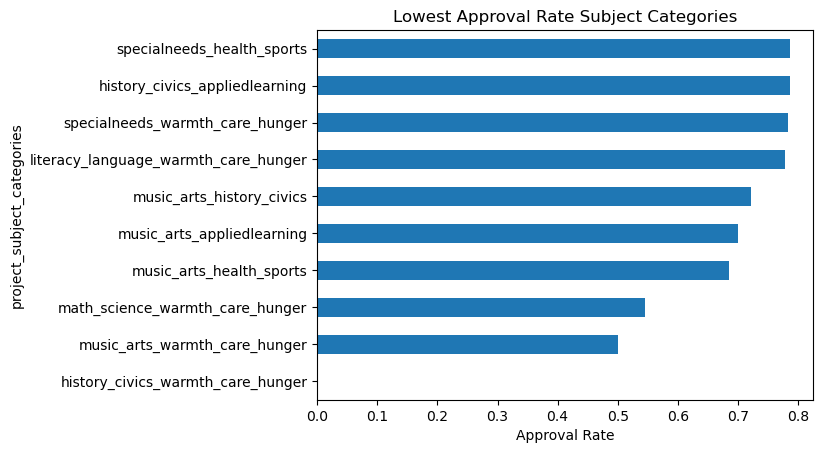

In [15]:
bottom10.plot(kind='barh')
plt.title("Lowest Approval Rate Subject Categories")
plt.xlabel("Approval Rate")
plt.show()


### Insight: Low Performing Subject Categories

The above chart shows subject combinations with the lowest approval rates.
These categories perform significantly worse than the overall average approval rate (~85%),
indicating that certain types of projects face more difficulty in getting approved.


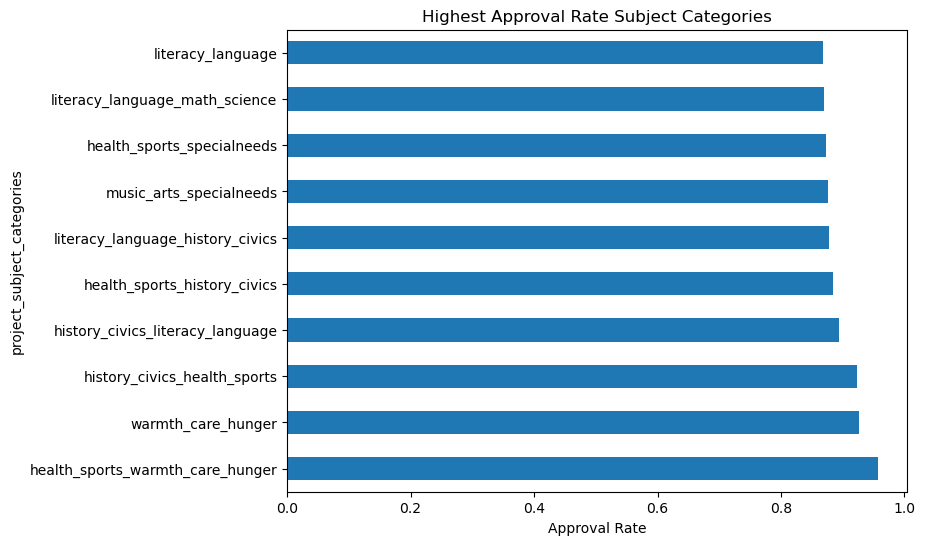

In [16]:
top10 = subject_approval.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
top10.plot(kind='barh')
plt.title("Highest Approval Rate Subject Categories")
plt.xlabel("Approval Rate")
plt.show()

### Insight: High Performing Subject Categories

These subject categories consistently achieve higher approval rates than average.
This suggests that donors and reviewers may prioritize projects addressing these needs.


In [17]:
grade_approval = df.groupby('project_grade_category')['project_is_approved'].mean().sort_values()
grade_approval


project_grade_category
grades_9_12      0.837636
grades_6_8       0.842522
grades_prek_2    0.848751
grades_3_5       0.854377
Name: project_is_approved, dtype: float64

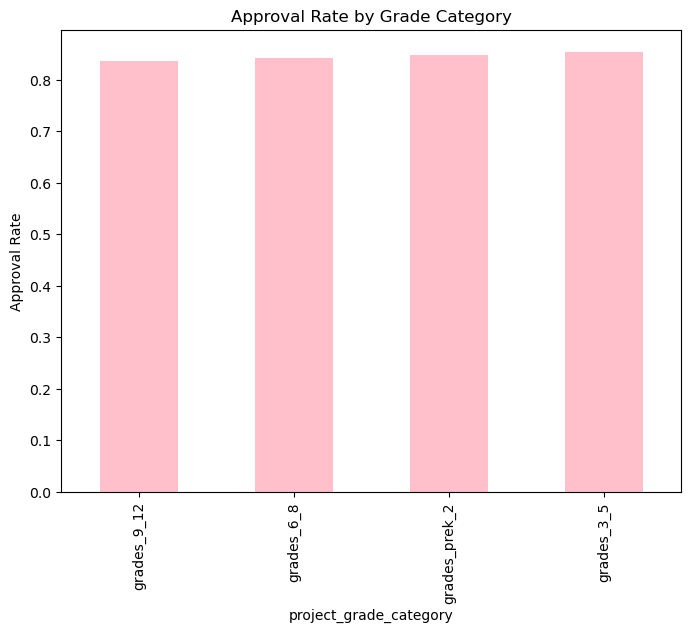

In [29]:
plt.figure(figsize=(8,6))
grade_approval.plot(kind='bar', color=['pink'] )
plt.title("Approval Rate by Grade Category")
plt.ylabel("Approval Rate")
plt.show()


### Approval Rate by Grade Category

Projects for lower grade levels (Grades 3–5 and PreK–2) have slightly higher approval rates compared to projects for higher grades (6–8 and 9–12).
This suggests that donors may be more inclined to support projects aimed at younger students.


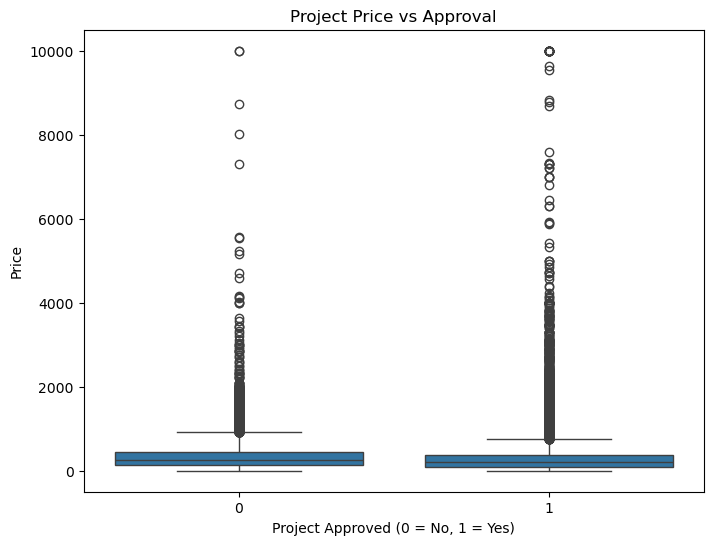

In [30]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x='project_is_approved', y='price', data=df)
plt.title("Project Price vs Approval")
plt.xlabel("Project Approved (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.show()


While price is often assumed to be a major factor in project approval,
the data suggests that approved and rejected projects have very similar price distributions.
This indicates that project cost alone is not a strong determinant of approval.


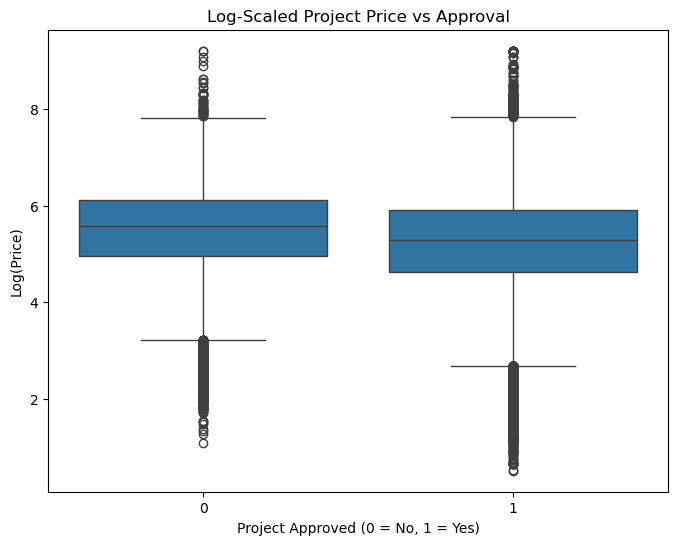

In [31]:
import numpy as np

plt.figure(figsize=(8,6))
sns.boxplot(x='project_is_approved', y=np.log1p(df['price']), data=df)
plt.title("Log-Scaled Project Price vs Approval")
plt.xlabel("Project Approved (0 = No, 1 = Yes)")
plt.ylabel("Log(Price)")
plt.show()


### Price vs Project Approval

The price distributions for approved and rejected projects are highly overlapping.
This suggests that project cost alone does not strongly influence approval decisions.
Even high-cost projects can be approved if other factors are favorable.


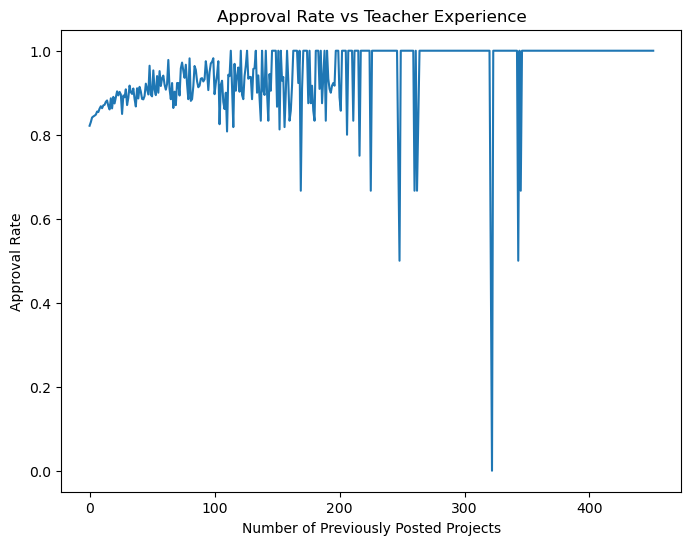

In [32]:
exp_approval = df.groupby('teacher_number_of_previously_posted_projects')['project_is_approved'].mean()

plt.figure(figsize=(8,6))
exp_approval.plot()
plt.title("Approval Rate vs Teacher Experience")
plt.xlabel("Number of Previously Posted Projects")
plt.ylabel("Approval Rate")
plt.show()


/var/folders/ck/z5x0f87n51g0pn_yrg4gyyp80000gn/T/ipykernel_12166/2831864264.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_grouped = df.groupby('experience_group')['project_is_approved'].mean()


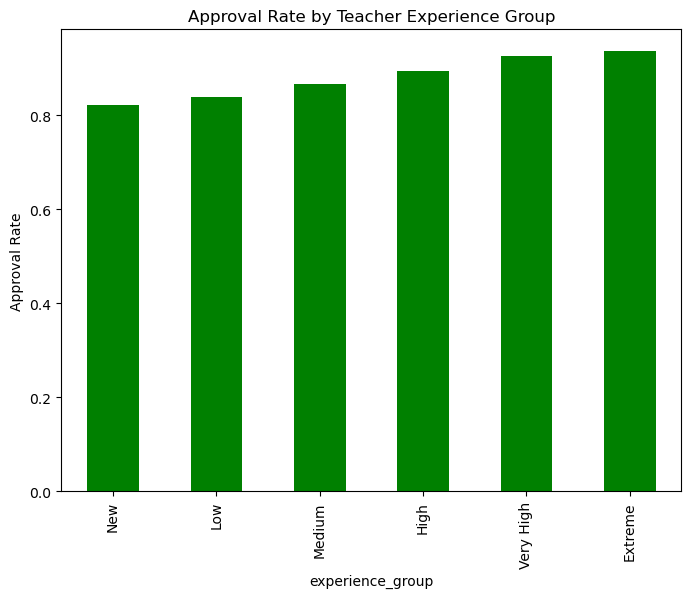

In [39]:
df['experience_group'] = pd.cut(
    df['teacher_number_of_previously_posted_projects'],
    bins=[-1, 0, 5, 20, 50, 100, 500],
    labels=['New', 'Low', 'Medium', 'High', 'Very High', 'Extreme']
)

exp_grouped = df.groupby('experience_group')['project_is_approved'].mean()

plt.figure(figsize=(8,6))
exp_grouped.plot(kind='bar' , color = ['green'] )
plt.title("Approval Rate by Teacher Experience Group")
plt.ylabel("Approval Rate")
plt.show()


### Teacher Experience vs Approval Rate

Projects submitted by more experienced teachers have a higher likelihood of approval.
New teachers face slightly lower approval rates, while highly experienced teachers consistently achieve high approval.
This suggests that familiarity with the platform and proposal-writing skills play an important role in project success.


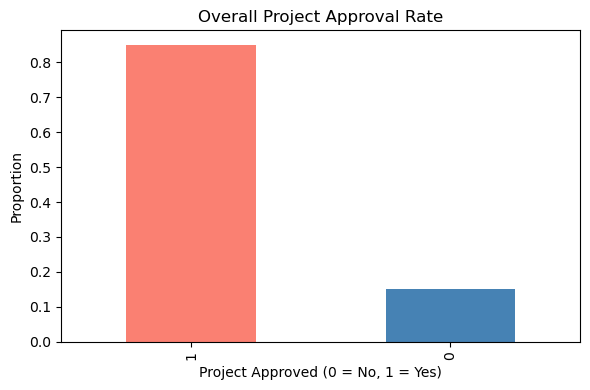

In [40]:
import matplotlib.pyplot as plt

approval_rate = df['project_is_approved'].value_counts(normalize=True)

plt.figure(figsize=(6,4))
approval_rate.plot(kind='bar', color=['salmon', 'steelblue'])
plt.title("Overall Project Approval Rate")
plt.xlabel("Project Approved (0 = No, 1 = Yes)")
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()
